In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [3]:
!pip install -U matplotlib
!pip install -U font-manager

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: Could not find a version that satisfies the requirement font-manager (from versions: none)
ERROR: No matching distribution found for font-manager


In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import scipy
import seaborn as sns
import matplotlib.font_manager as fm
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
import warnings


Bad key text.latex.preview in file C:\Users\spa84\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\spa84\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\spa84\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You proba

In [5]:
warnings.simplefilter('ignore')

In [6]:
font_path = "C:\\Users\\spa84\\Downloads\\text_mining\\NanumGothic.ttf"  # 나눔 폰트의 경로를 지정
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc("font", family=font_name)

In [7]:
path = './data/'

df = pd.read_csv(path+'Total_APT_for_Target_Features.csv')

In [8]:
df

,Sell_Price,Sell_Count,JS_Price,JS_Count,CR,UR,LC_index,CA_index,TC_index,SDT_index,IR,Crime_Rates,Total_Pop,Univ_Counts,Park_Counts,School_Counts,Subway_Counts
0,82549.28,133,38076.56,750,46.13,3.1,74.5,81.5,78.5,102.461258,3.0,1.548846,554870,1.0,7,77,21
1,44177.42,116,21442.84,490,48.54,3.1,74.5,81.5,78.5,102.461258,3.0,1.548846,484742,0.0,7,60,14
2,28957.76,58,18593.14,217,64.21,3.1,74.5,81.5,78.5,102.461258,3.0,1.548846,338041,1.0,4,34,3
3,29813.92,96,19282.70,548,64.68,3.1,74.5,81.5,78.5,102.461258,3.0,1.548846,561431,2.0,9,80,9
4,27317.47,99,21386.54,260,78.29,3.1,74.5,81.5,78.5,102.461258,3.0,1.548846,517095,1.0,2,55,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3045,132585.00,30,73065.05,261,55.11,2.1,109.0,109.0,110.3,87.677816,2.5,0.865139,215891,2.0,2,34,10
3046,54418.49,119,40223.93,453,73.92,2.1,109.0,109.0,110.3,87.677816,2.5,0.865139,465727,1.0,7,66,13
3047,23635.22,23,50643.70,64,214.27,2.1,109.0,109.0,110.3,87.677816,2.5,0.865139,140477,6.0,12,36,15
3048,99441.18,34,56290.27,135,56.61,2.1,109.0,109.0,110.3,87.677816,2.5,0.865139,119206,2.0,4,31,23


## Categorical:

- Nominal(variables that have two or more categories, but which do not have an intrinsic order.)

    - Region_Name : 자치구 명
    - Building_Use : 건물 용도
    
- Ordinal(variables that have two or more categories just like nominal variables. Only the categories can also be ordered or ranked.)

    
## Numeric:

- Discrete
    - Year : 년
    - Month : 월
    - Region_Code : 자치구 코드
    - JS_Count : 전세 거래량
   
- Continous
    - Sell : 매매
    - Sell_Price : 매매 가격
    - Sell_BA = Sell_building Area : 매매 건물 면적
    - Sell_PPA = Sell_Price Per Area : 면적 당 매매 가격
    - Sell_PPP = Sell_Price Per Pyeong : 평 당 매매 가격
    - Sell_Count : 매매 거래량
    - JS : 전세
    - JS_Price : 전세 가격
    - JS_BA = JS_Building Area : 임대 면적
    - JS_PPA = JS_Price Per Area : 임대 면적 당 전세 가격
    - JS_PPP = JS_Price Per Pyeong : 평 당 전세 가격
    - CR = Charter Rate : 전세가율
    - CR_PPA  = Charter_Rate_Price Per Area : 면적 당 전세가율
    - CR_PPP = Charter Rate_Price Per Pyeong : 평 당 전세가율
    - lR = Interest Rate : 금리
    - UR = Unemployment Rate : 실업률
    - LC_index = Leading Composite index : 선행종합 지수
    - CA_index = Comprehensive Accompany index : 동행종합 지수
    - TC_index = Trailing Composite index : 후행종합 지수
    - SDT_index = Supply and Demand Trend index = 전세수급동향 지수
    

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3050 entries, 0 to 3049
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sell_Price     3050 non-null   float64
 1   Sell_Count     3050 non-null   int64  
 2   JS_Price       3050 non-null   float64
 3   JS_Count       3050 non-null   int64  
 4   CR             3050 non-null   float64
 5   UR             3050 non-null   float64
 6   LC_index       3050 non-null   float64
 7   CA_index       3050 non-null   float64
 8   TC_index       3050 non-null   float64
 9   SDT_index      3050 non-null   float64
 10  IR             3050 non-null   float64
 11  Crime_Rates    3050 non-null   float64
 12  Total_Pop      3050 non-null   int64  
 13  Univ_Counts    3050 non-null   float64
 14  Park_Counts    3050 non-null   int64  
 15  School_Counts  3050 non-null   int64  
 16  Subway_Counts  3050 non-null   int64  
dtypes: float64(11), int64(6)
memory usage: 405.2 KB


In [10]:
df.columns

Index(['Sell_Price', 'Sell_Count', 'JS_Price', 'JS_Count', 'CR', 'UR',
       'LC_index', 'CA_index', 'TC_index', 'SDT_index', 'IR', 'Crime_Rates',
       'Total_Pop', 'Univ_Counts', 'Park_Counts', 'School_Counts',
       'Subway_Counts'],
      dtype='object')

## Feature_Scaling

In [11]:
# Min-Max 스케일러 생성
scaler = MinMaxScaler()

# 정규화할 열 선택 (수치형 데이터만)
numeric_columns = df.select_dtypes(include=['float', 'int']).columns

# 데이터 정규화
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

## DF 사전진단

### 선형패턴 확인

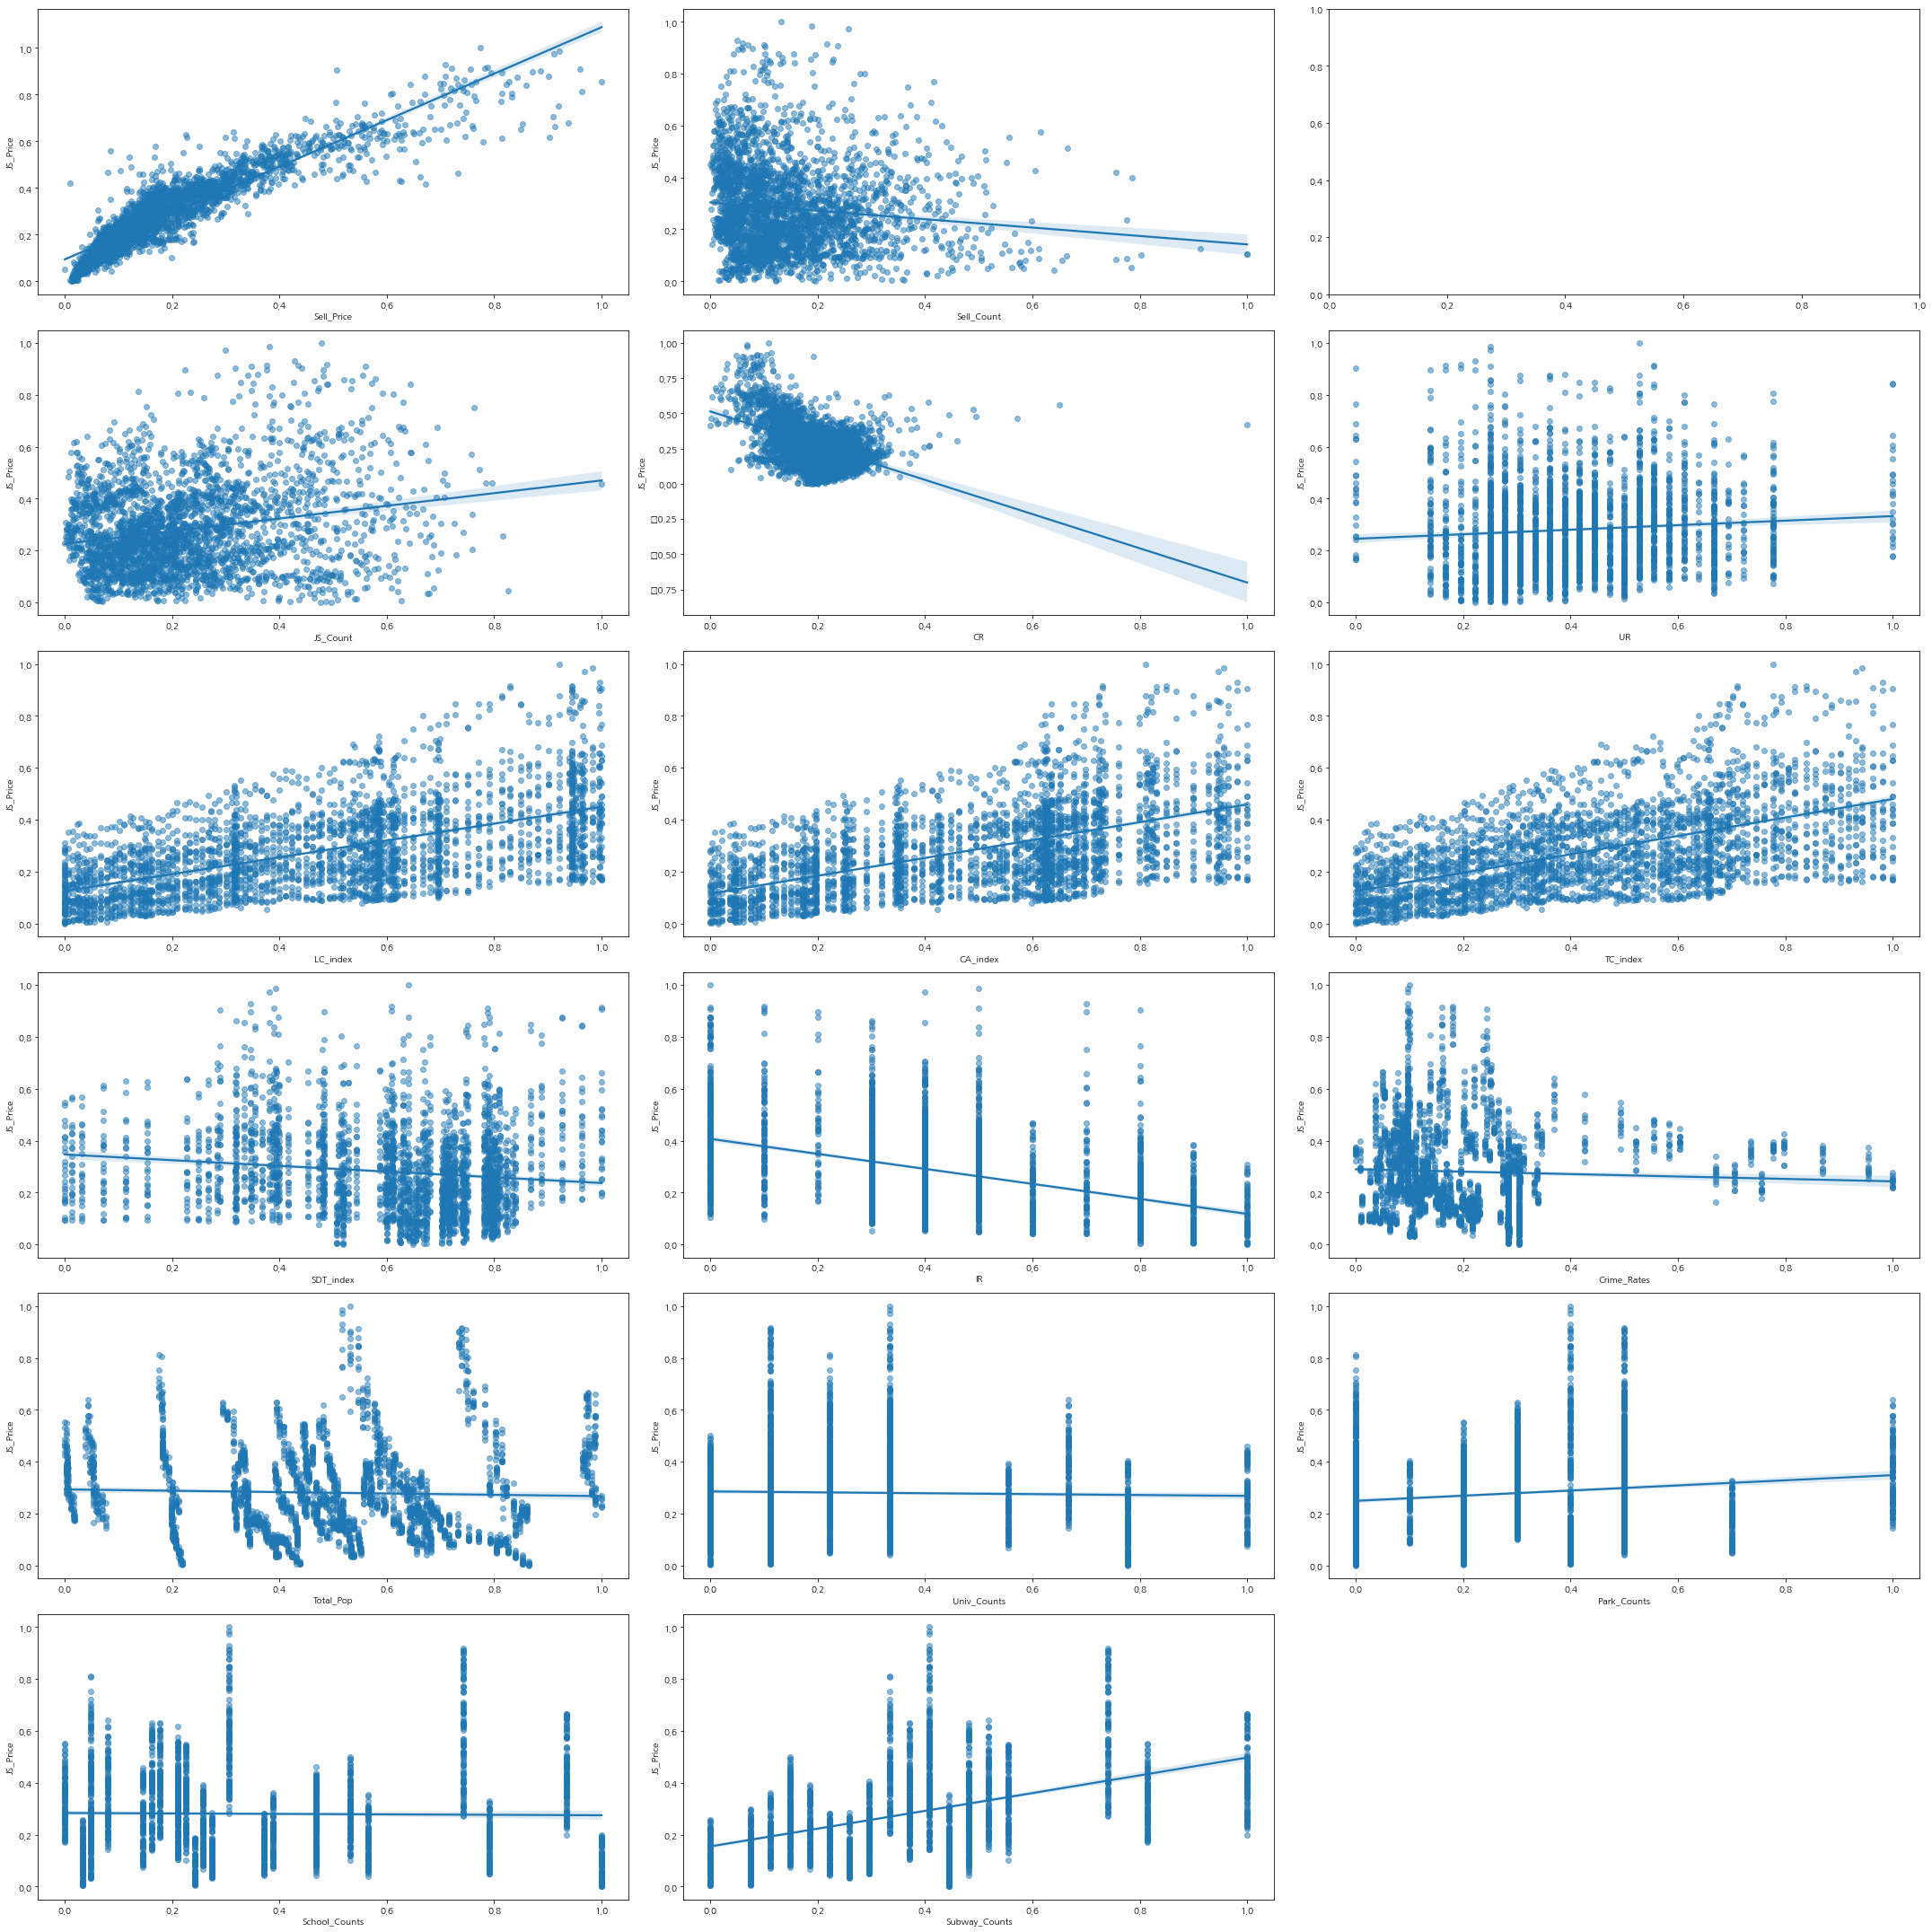

In [12]:
count = len(df.columns) - 1
col = 3

fig, ax = plt.subplots(nrows=math.ceil(count / col), ncols=col, figsize=(30,30))
ax = ax.ravel()  # 2D 배열을 1D 배열로 평탄화

# 독립 변수와 종속 변수 간의 선형 관계 확인
for i, independent_column in enumerate(df.columns):
    if independent_column != 'JS_Price':
        if i < len(ax):  # 인덱스가 배열 크기를 벗어나지 않도록 확인
            sns.regplot(x=independent_column, y='JS_Price', data=df, ax=ax[i], scatter_kws={'alpha': 0.5})
            ax[i].set_xlabel(independent_column)
            ax[i].set_ylabel('JS_Price')

# 남은 subplot 비우기
for i in range(len(df.columns), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

## 이상치 확인

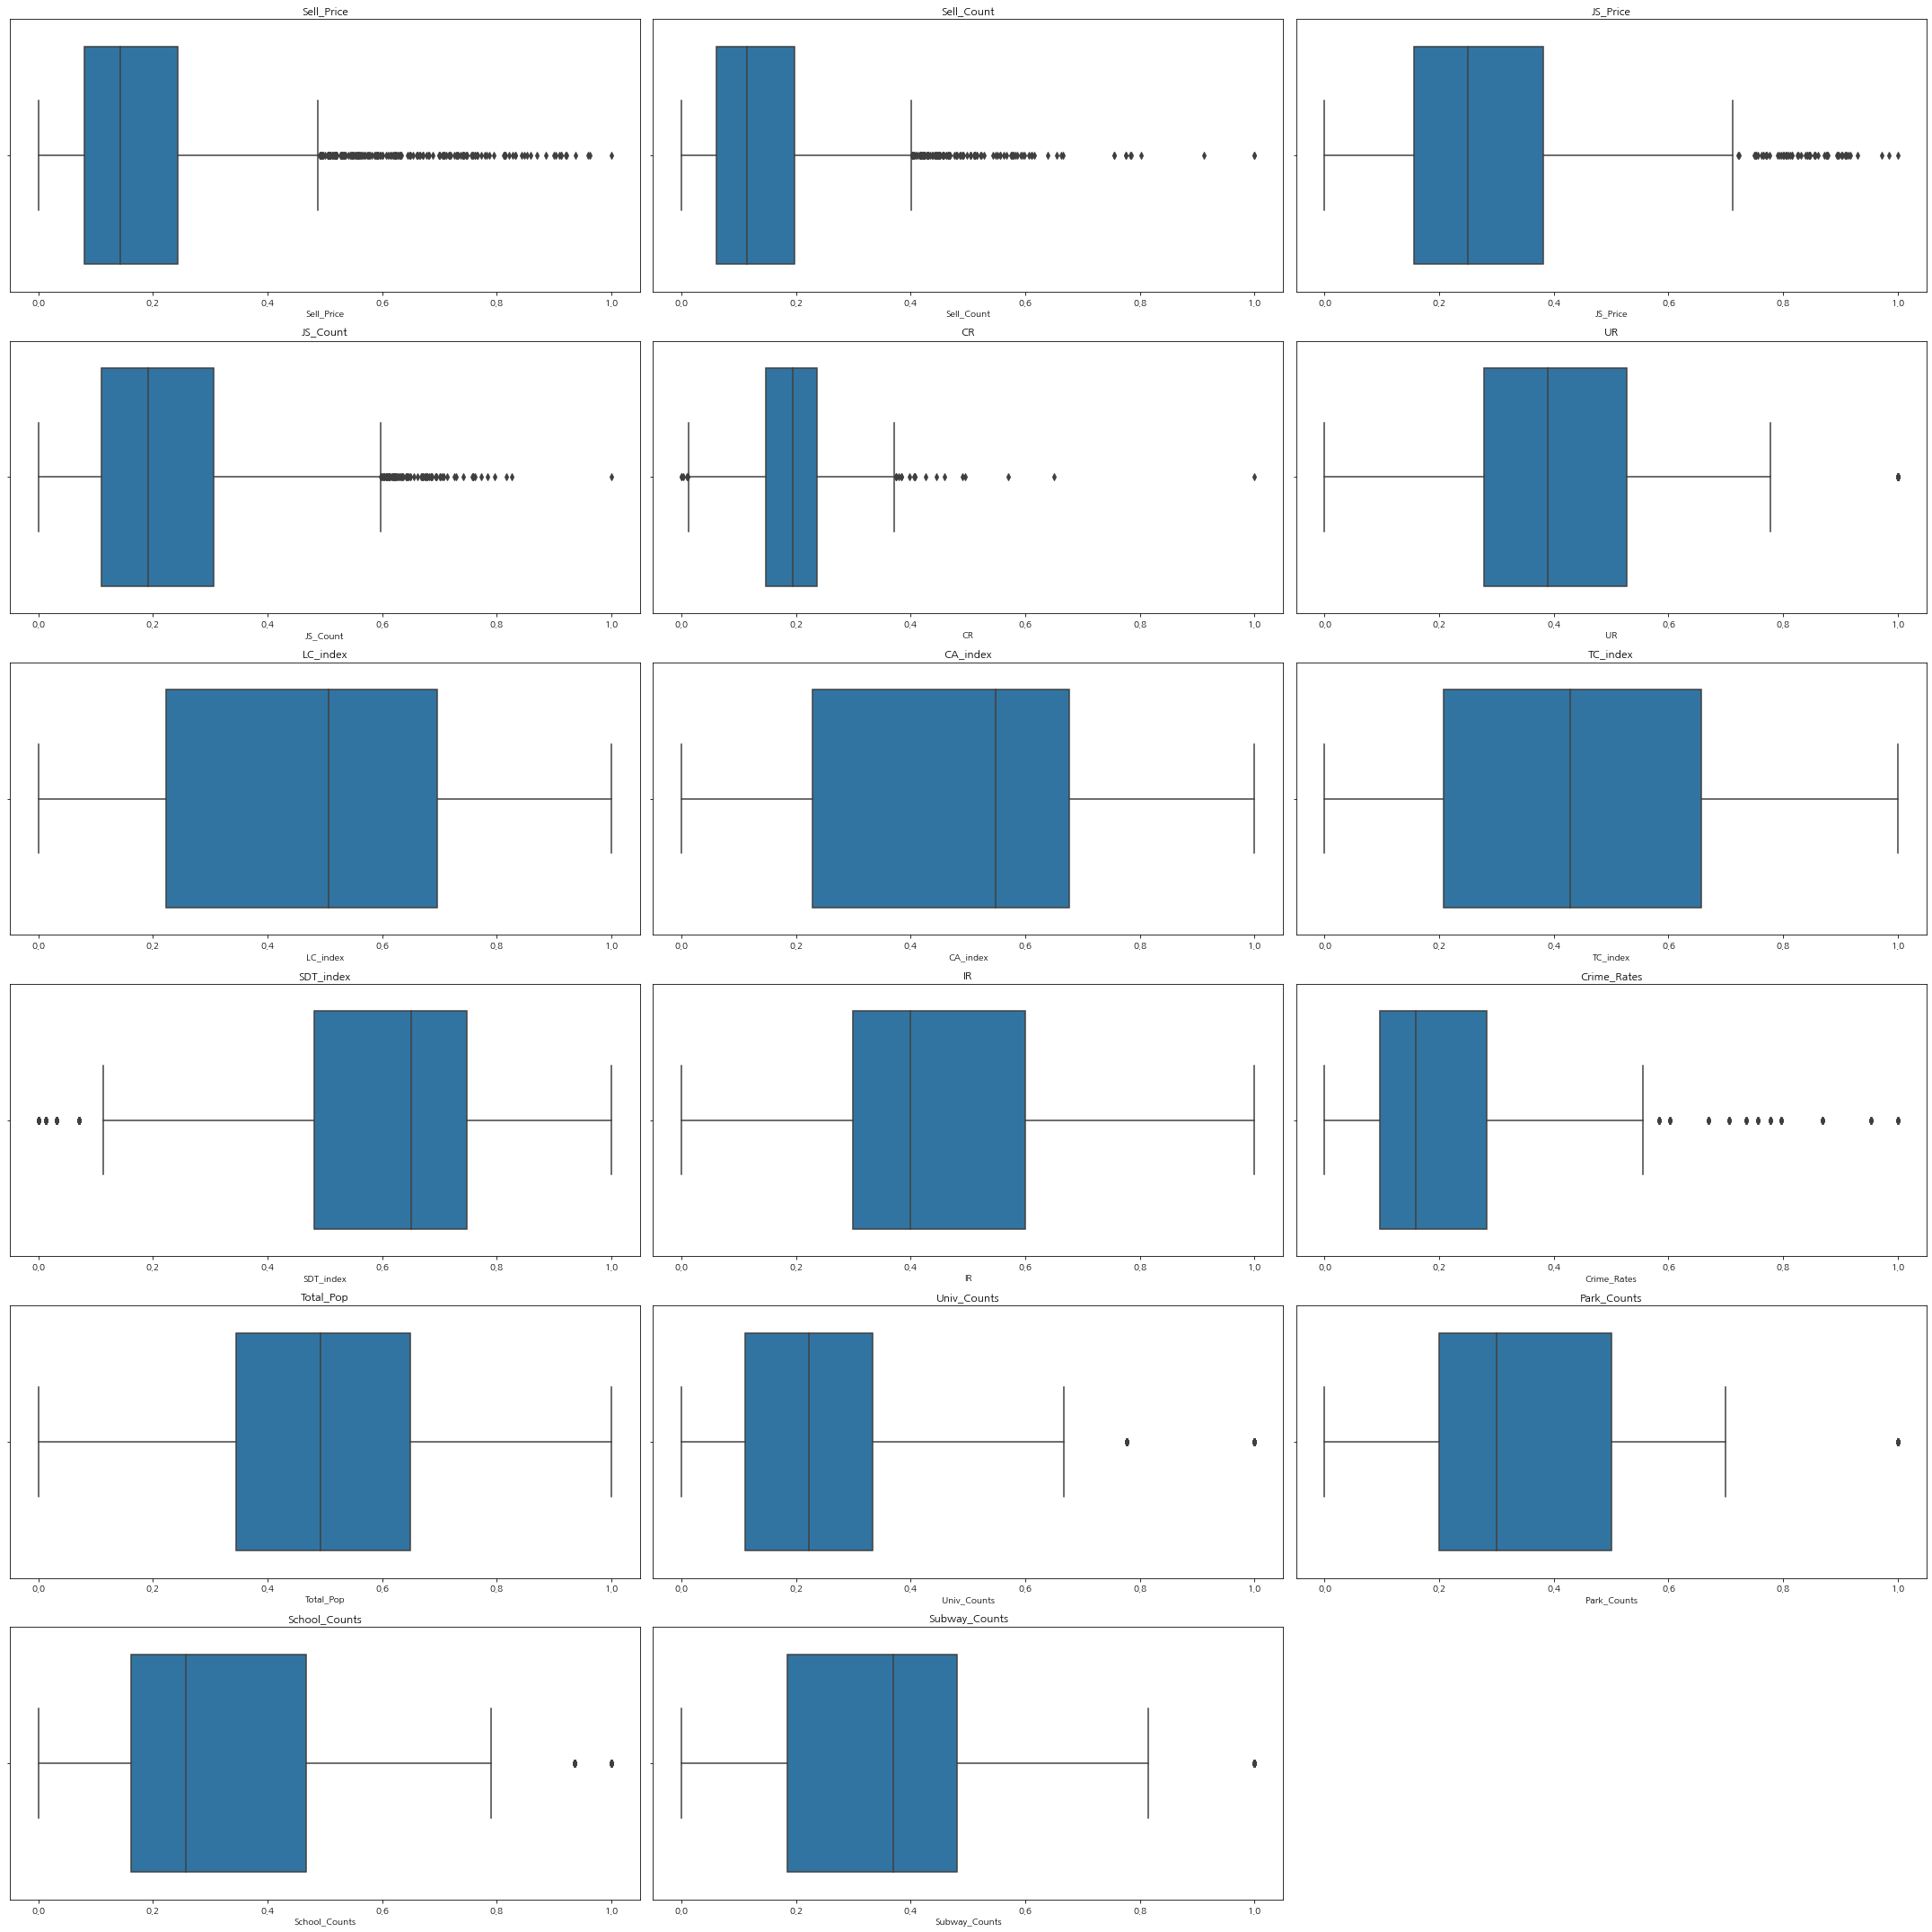

In [13]:
count = len(df.columns) - 1
col = 3

fig, ax = plt.subplots(nrows=math.ceil(count / col), ncols=col, figsize=(30, 30))
ax = ax.ravel()  # 2D 배열을 1D 배열로 평탄화

for i, column in enumerate(df.columns):
    if i < len(ax):  # 인덱스가 배열 크기를 벗어나지 않도록 확인
        sns.boxplot(x=column, data=df, ax=ax[i], orient='v')
        ax[i].set_title(column)

# 남은 subplot 비우기
for i in range(len(df.columns), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

### 정규성 확인

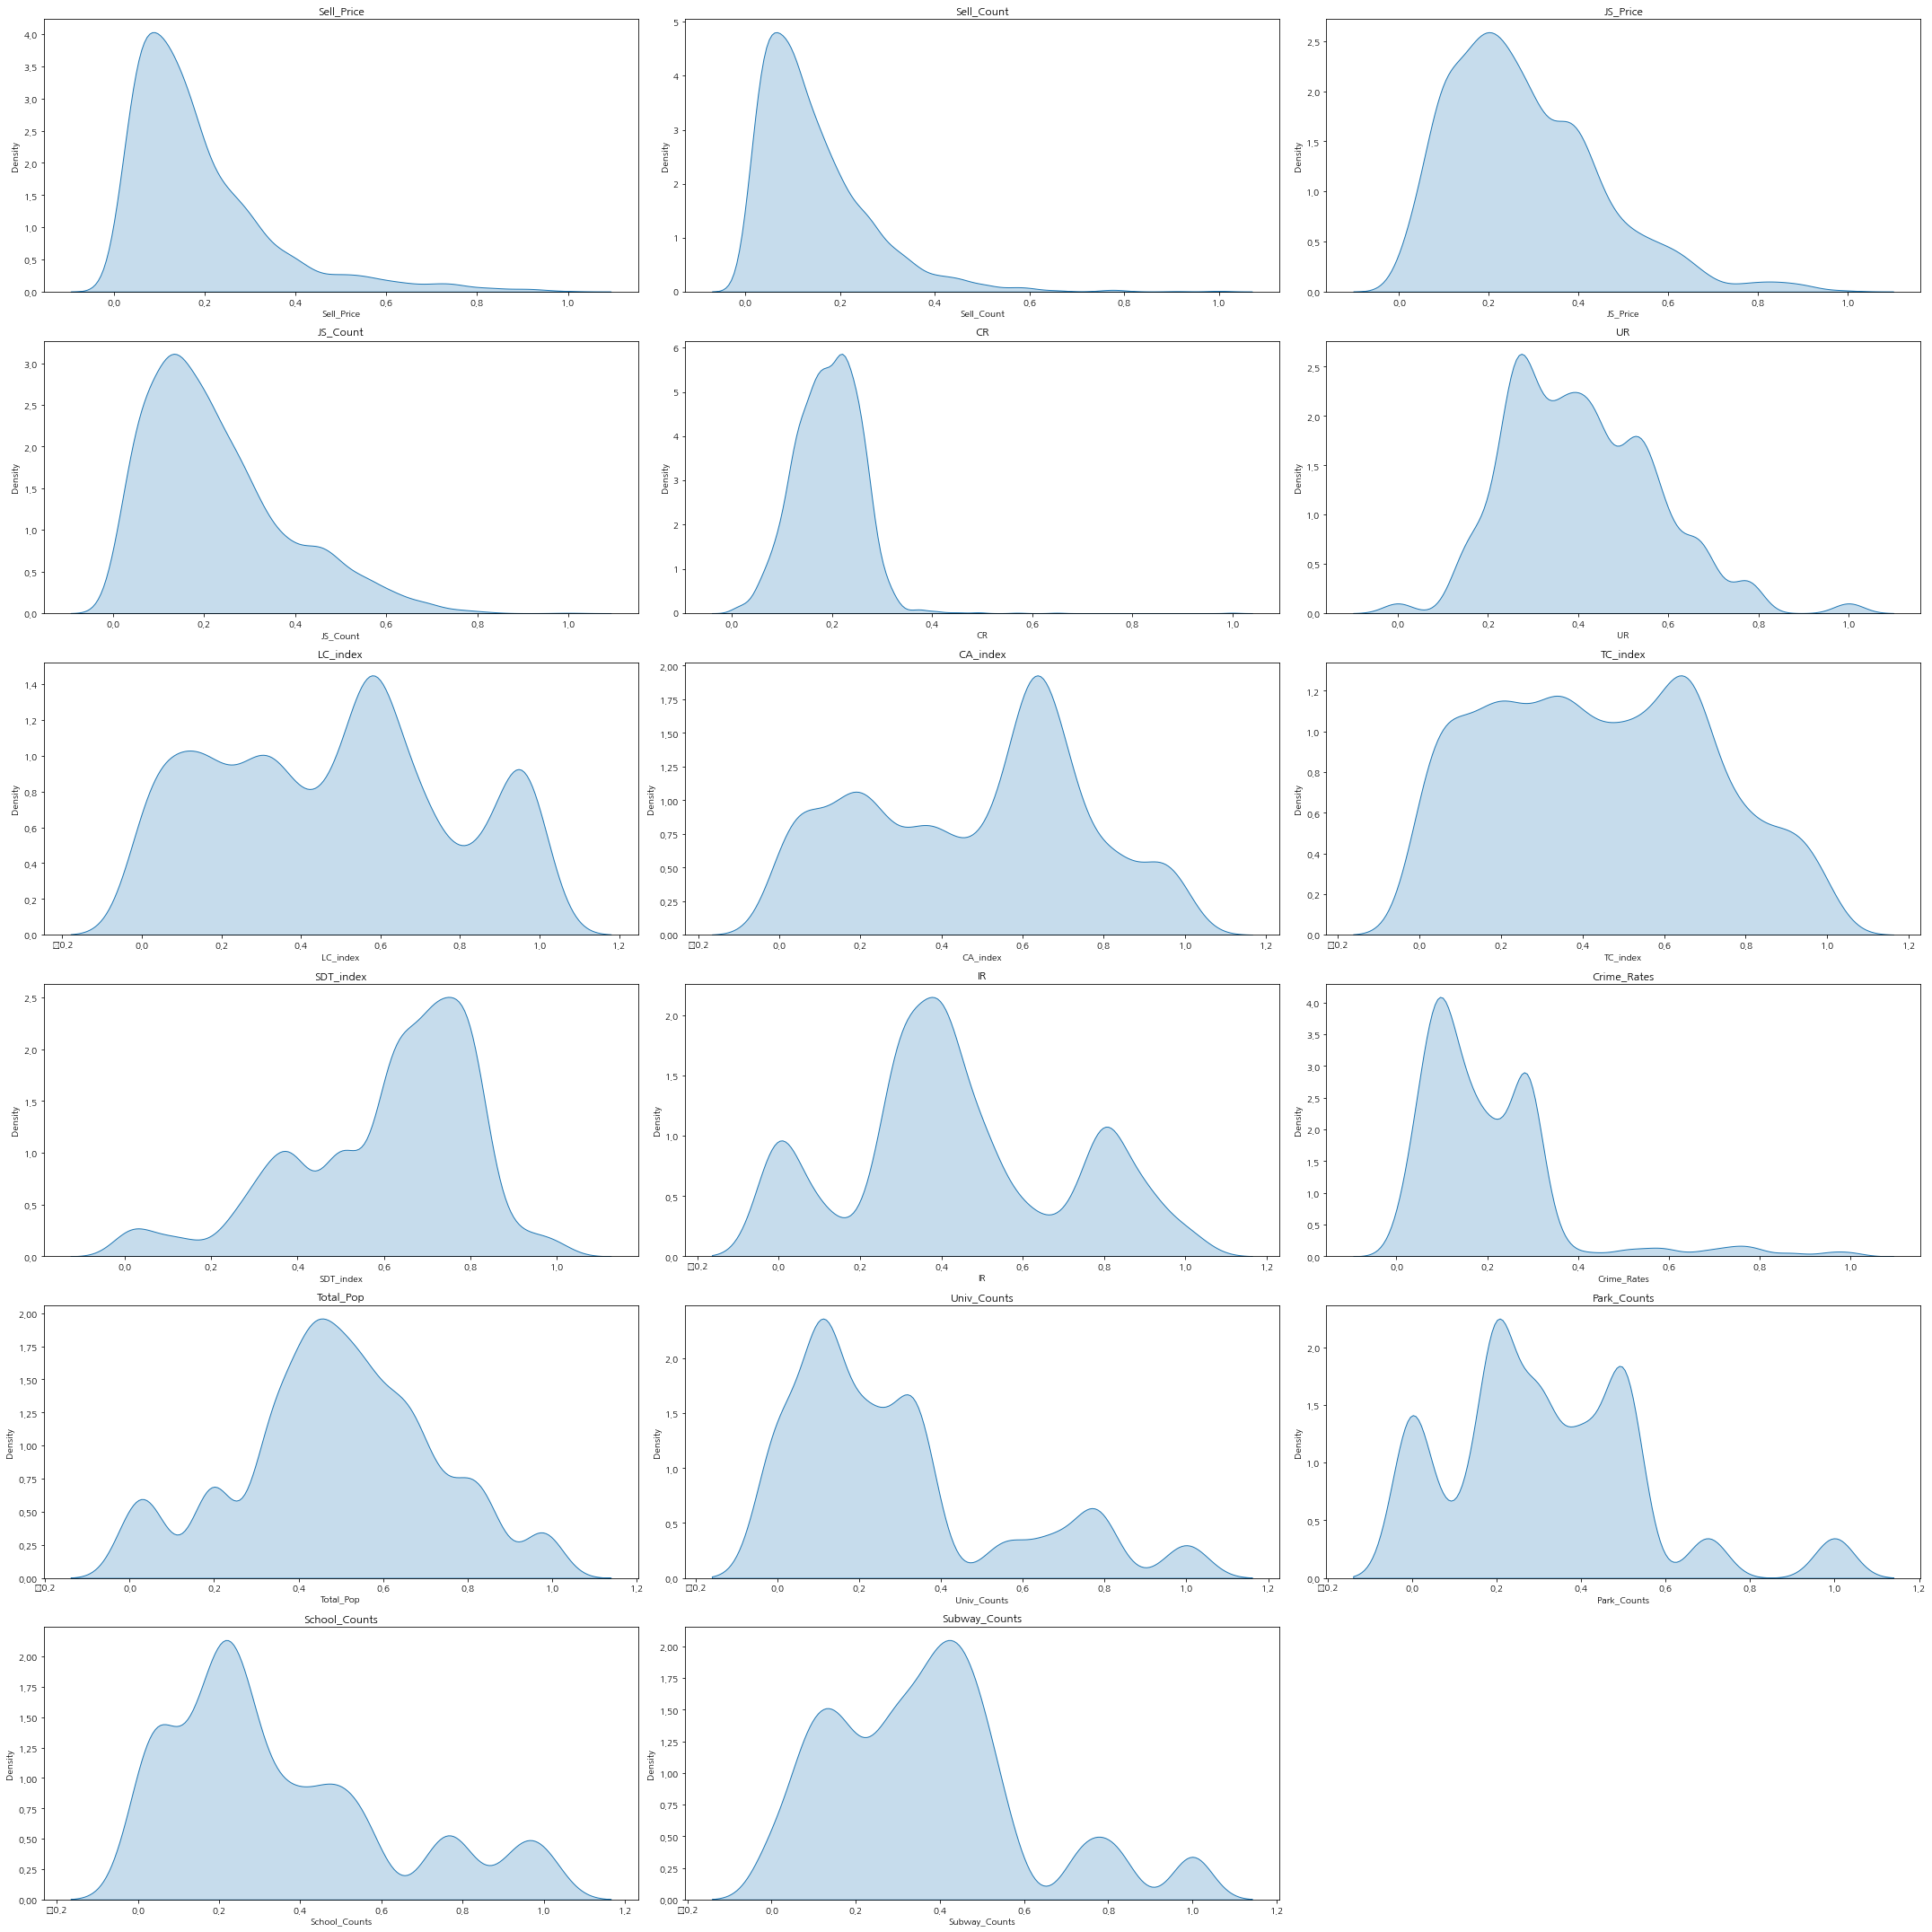

In [14]:
count = len(df.columns) - 1
col = 3

fig, ax = plt.subplots(nrows=math.ceil(count / col), ncols=col, figsize=(30, 30))
ax = ax.ravel()  # 2D 배열을 1D 배열로 평탄화

for i, column in enumerate(df.columns):
    if i < len(ax):  # 인덱스가 배열 크기를 벗어나지 않도록 확인
        sns.kdeplot(data=df[column], ax=ax[i], shade=True)
        ax[i].set_title(column)

# 남은 subplot 비우기
for i in range(len(df.columns), len(ax)):
    fig.delaxes(ax[i])

plt.tight_layout()
plt.show()

In [15]:
for column in df.columns:
    print(f"{column}의 왜도는", scipy.stats.skew(df[column]))

Sell_Price의 왜도는 1.8837557373360097
Sell_Count의 왜도는 1.8312142849406696
JS_Price의 왜도는 0.9626082052229692
JS_Count의 왜도는 1.0076571870689766
CR의 왜도는 0.7518863988469151
UR의 왜도는 0.5573598207839768
LC_index의 왜도는 0.10460796279012495
CA_index의 왜도는 -0.12221680358123123
TC_index의 왜도는 0.15836248557227214
SDT_index의 왜도는 -0.8853293439129971
IR의 왜도는 0.221794371455936
Crime_Rates의 왜도는 2.303442660859544
Total_Pop의 왜도는 -0.10695592998874945
Univ_Counts의 왜도는 1.1653627448941446
Park_Counts의 왜도는 0.8567339937234614
School_Counts의 왜도는 0.9180336647344943
Subway_Counts의 왜도는 0.7965513939976036


## Regression Analysis

In [16]:
# 특성 선택
selected_features = ['Sell_Price', 'Sell_Count', 'JS_Count', 'CR', 'UR',
       'LC_index', 'CA_index', 'TC_index', 'SDT_index', 'IR', 'Crime_Rates',
       'Total_Pop', 'Univ_Counts', 'Park_Counts', 'School_Counts',
       'Subway_Counts']

# X 데이터 선택
X = df[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

# 결과 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               JS_Price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     3437.
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:01:05   Log-Likelihood:                 5579.0
No. Observations:                3050   AIC:                        -1.112e+04
Df Residuals:                    3033   BIC:                        -1.102e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2028      0.011    -18.677

## 다중공선성

In [17]:
# X 데이터에서 상수항 제거 (VIF 계산에서 상수항은 제외해야 함)
X_without_constant = X.drop('const', axis=1)

# VIF 계산
vif = pd.DataFrame()
vif["Features"] = X_without_constant.columns
vif["VIF"] = [variance_inflation_factor(X_without_constant.values, i) for i in range(X_without_constant.shape[1])]

# 결과 출력
print(vif)

         Features         VIF
0      Sell_Price    8.848360
1      Sell_Count    5.603957
2        JS_Count   15.156531
3              CR   24.576236
4              UR    7.481152
5        LC_index  787.449101
6        CA_index  356.408111
7        TC_index  553.940255
8       SDT_index   19.897706
9              IR   10.206207
10    Crime_Rates    6.449361
11      Total_Pop   49.030703
12    Univ_Counts    2.629296
13    Park_Counts    3.365288
14  School_Counts   27.034118
15  Subway_Counts    8.418101


- 다중공선성과 회귀분석 모델의 각 독립변수의 통계적 유의성(P>|t|값으로판단)을 고려하여 LC_index, UR제거하고 다시 모델 생성

In [18]:
# 특성 선택
selected_features = ['Sell_Price', 'Sell_Count', 'JS_Count', 'CR',
                     'CA_index', 'TC_index', 'SDT_index', 'IR', 'Crime_Rates',
                     'Total_Pop', 'Univ_Counts', 'Park_Counts', 'School_Counts',
                     'Subway_Counts']

# X 데이터 선택
X = df[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

# 결과 요약 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               JS_Price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     3927.
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:01:05   Log-Likelihood:                 5577.6
No. Observations:                3050   AIC:                        -1.113e+04
Df Residuals:                    3035   BIC:                        -1.103e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2117      0.009    -22.428

- 모든 변수가 통계적으로 유의한 것을 확인할 수 있다.

## 모델가정 확인

### 선형성

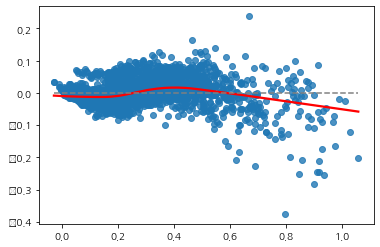

In [19]:
fitted = model.predict(X)
residual = df['JS_Price'] - fitted

sns.regplot(x=fitted, y=residual, lowess=True, line_kws={'color':'red'})

plt.plot([fitted.min(), fitted.max()], [0, 0], '--', color='grey')

### 정규성

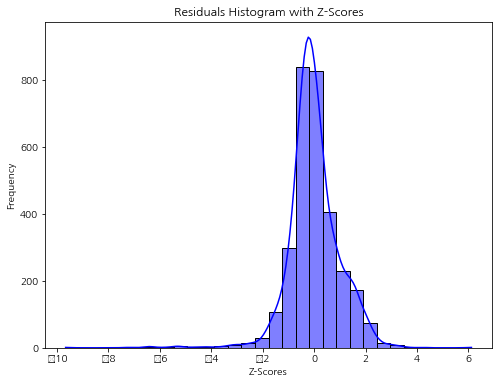

Shapiro-Wilk Test p-value: 4.769202174777897e-38


In [20]:
fitted = model.predict(X)

# 회귀분석 모델을 통해 얻은 잔차 계산
residual = df['JS_Price'] - fitted

# 잔차의 Z-score 계산
sr = stats.zscore(residual)

# Z-score를 이용한 히스토그램
plt.figure(figsize=(8, 6))
sns.histplot(sr, kde=True, bins=30, color='blue')
plt.title('Residuals Histogram with Z-Scores')
plt.xlabel('Z-Scores')
plt.ylabel('Frequency')
plt.show()

# Shapiro-Wilk 정규성 검정
shapiro_test = stats.shapiro(residual)
p_value = shapiro_test.pvalue
print('Shapiro-Wilk Test p-value:', p_value)

- 정규성 만족을 위해 이상치 제거한 뒤 다시 정규성 확인

In [21]:
from statsmodels.stats.outliers_influence import OLSInfluence

# 이상치 확인
cd, _ = OLSInfluence(model).cooks_distance
cd.sort_values(ascending=False).head()

3047    0.969231
2970    0.053852
2770    0.051221
2820    0.040055
3025    0.032007
dtype: float64

In [22]:
# Cook's 거리를 Series로 변환하고 내림차순으로 정렬
cd_series = pd.Series(cd, name="Cook's Distance")
cd_sorted = cd_series.sort_values(ascending=False)

# Cook's 거리가 가장 큰 관측치 50개의 인덱스 확인
outlier_indices = cd_sorted.head(50).index

# Cook's 거리가 큰 관측치를 데이터프레임에서 제거
df = df.drop(index=outlier_indices)

In [23]:
# 특성 선택
selected_features = ['Sell_Price', 'Sell_Count', 'JS_Count', 'CR',
                     'CA_index', 'TC_index', 'SDT_index', 'IR', 'Crime_Rates',
                     'Total_Pop', 'Univ_Counts', 'Park_Counts', 'School_Counts',
                     'Subway_Counts']

# X 데이터 선택
X = df[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

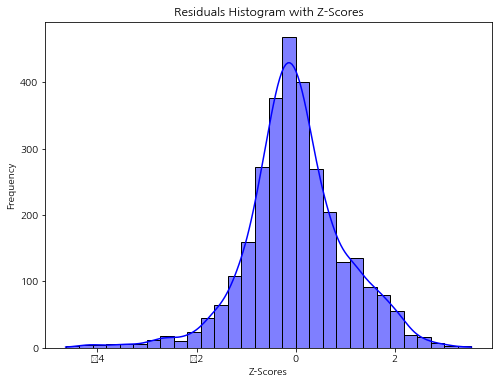

Shapiro-Wilk Test p-value: 2.197813939817797e-22


In [24]:
fitted = model.predict(X)

# 회귀분석 모델을 통해 얻은 잔차 계산
residual = df['JS_Price'] - fitted

# 잔차의 Z-score 계산
sr = stats.zscore(residual)

# Z-score를 이용한 히스토그램
plt.figure(figsize=(8, 6))
sns.histplot(sr, kde=True, bins=30, color='blue')
plt.title('Residuals Histogram with Z-Scores')
plt.xlabel('Z-Scores')
plt.ylabel('Frequency')
plt.show()

# Shapiro-Wilk 정규성 검정
shapiro_test = stats.shapiro(residual)
p_value = shapiro_test.pvalue
print('Shapiro-Wilk Test p-value:', p_value)

- 정규성 만족을 위해 종속변수 로그변환한 뒤 다시 정규성 확인

In [25]:
df['JS_Price'] = np.log(df['JS_Price']+1)

In [26]:
# 특성 선택
selected_features = ['Sell_Price', 'Sell_Count', 'JS_Count', 'CR',
                     'CA_index', 'TC_index', 'SDT_index', 'IR', 'Crime_Rates',
                     'Total_Pop', 'Univ_Counts', 'Park_Counts', 'School_Counts',
                     'Subway_Counts']

# X 데이터 선택
X = df[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

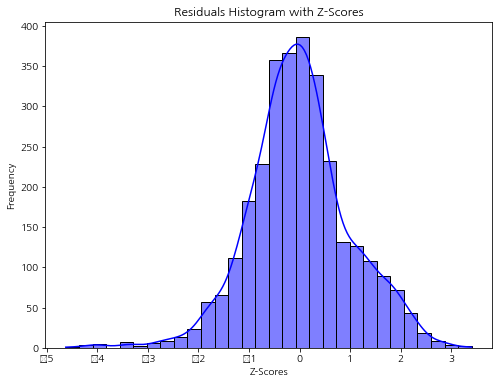

Shapiro-Wilk Test p-value: 2.6733556249383715e-16


In [27]:
fitted = model.predict(X)

# 회귀분석 모델을 통해 얻은 잔차 계산
residual = df['JS_Price'] - fitted

# 잔차의 Z-score 계산
sr = stats.zscore(residual)

# Z-score를 이용한 히스토그램
plt.figure(figsize=(8, 6))
sns.histplot(sr, kde=True, bins=30, color='blue')
plt.title('Residuals Histogram with Z-Scores')
plt.xlabel('Z-Scores')
plt.ylabel('Frequency')
plt.show()

# Shapiro-Wilk 정규성 검정
shapiro_test = stats.shapiro(residual)
p_value = shapiro_test.pvalue
print('Shapiro-Wilk Test p-value:', p_value)

### 등분산성

<AxesSubplot:>

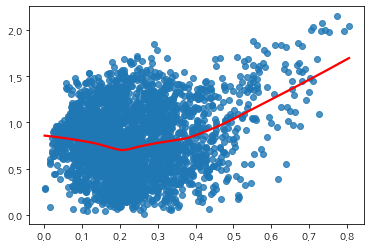

In [28]:
sns.regplot(x=fitted, y=np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

### 독립성

- Durbin-Watson:2.085으로 1.5~2.5사이이므로 잔차 간의 자기상관이 없다고 할 수 있으며, 회귀 모델은 독립성 가정을 만족

## 최종 모델 점검

In [29]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               JS_Price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     3802.
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:01:08   Log-Likelihood:                 6414.6
No. Observations:                3000   AIC:                        -1.280e+04
Df Residuals:                    2985   BIC:                        -1.271e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1273      0.007    -17.536

- 정규성을 만족시키기 위해 로그변환한 결과 Crime_Rates, SDT_index가 통계적으로 유의하지 않다고 나오므로 제거하고 다시 모델 생성

In [32]:
# 특성 선택
selected_features = ['Sell_Price', 'Sell_Count', 'JS_Count', 'CR',
                     'CA_index', 'TC_index', 'IR',
                     'Total_Pop', 'Univ_Counts', 'Park_Counts', 'School_Counts',
                     'Subway_Counts']

# X 데이터 선택
X = df[selected_features]

# 상수항 추가
X = sm.add_constant(X)

# 종속 변수 선택
Y = df['JS_Price']

# 회귀 모델 생성
model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               JS_Price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     4433.
Date:                Wed, 13 Sep 2023   Prob (F-statistic):               0.00
Time:                        18:02:00   Log-Likelihood:                 6412.7
No. Observations:                3000   AIC:                        -1.280e+04
Df Residuals:                    2987   BIC:                        -1.272e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1168      0.005    -24.233

In [33]:
model.params.sort_values(ascending=False)

Sell_Price       0.803398
CR               0.640045
CA_index         0.121639
Subway_Counts    0.112677
Total_Pop        0.104307
JS_Count         0.072767
Univ_Counts      0.026248
Park_Counts      0.010715
Sell_Count      -0.017649
IR              -0.029136
TC_index        -0.056138
const           -0.116778
School_Counts   -0.158372
dtype: float64